In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [47]:
BASE_DIR = './tmp/data'
TRAIN_DIR = os.path.join(BASE_DIR, "train.csv")
TEST_DIR = os.path.join(BASE_DIR, "test.csv")

In [56]:
def wrangle(path):
    # read the dataframe
    df = pd.read_csv(path).set_index("PassengerId")
    
    # Drop columns that contain more than 50% NULL values and high-cardinality categorical features
    drop_cols = ["Name", "Ticket", "Cabin"]
    df.drop(columns=drop_cols, inplace=True)
    
    # Fill missing values with mostly repeated values
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna("S", inplace=True)
    
    # 
#     df["Age"] = pd.cut(df["Age"], bins=5,  precision=1)
    
    # Label Encoding
    cols = ["Sex", "Embarked"]
    encoder = LabelEncoder()
    for col in cols:
        df[col] = encoder.fit_transform(df[col])
    
    return df

In [48]:
df = wrangle(TRAIN_DIR)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [50]:
df.isnull().sum() 
# Drop columns that contain Null values more than 50%
# Impute missing value

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [51]:
df.nunique() # Drop high-cardinality categorical features

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [52]:
df["Embarked"].value_counts() # Filling the missing values with mostly repeated values which is "S"

S    644
C    168
Q     77
Name: Embarked, dtype: int64

###  Visualize each Columns

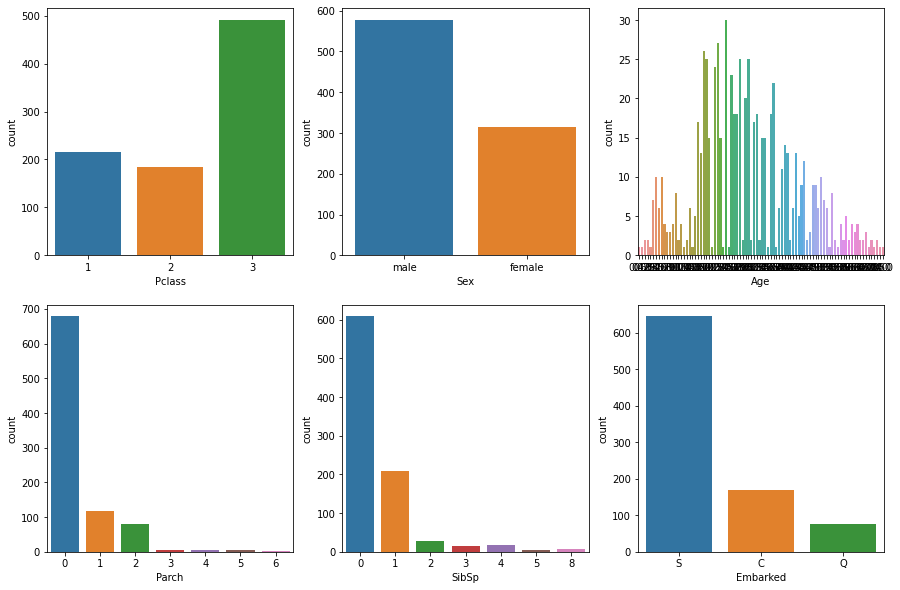

In [53]:
# get list of columns
columns =  ["Pclass", "Sex", "Age", "Parch", "SibSp", "Embarked"]

# Create the subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Flatten the axs array to simplify indexing
ax = ax.flatten()

# Loop through each column and plot it
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=ax[i])

In [59]:
# grouped the age
df["Age"] = pd.cut(df["Age"], bins=5)

### Multicollinerity

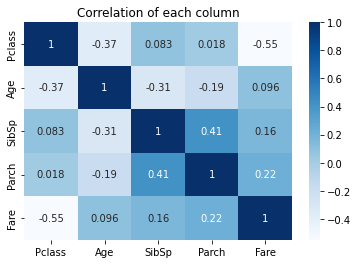

In [54]:
correlation = df.drop(columns="Survived").corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Correlation of each column");

### Compare each columns with the target 

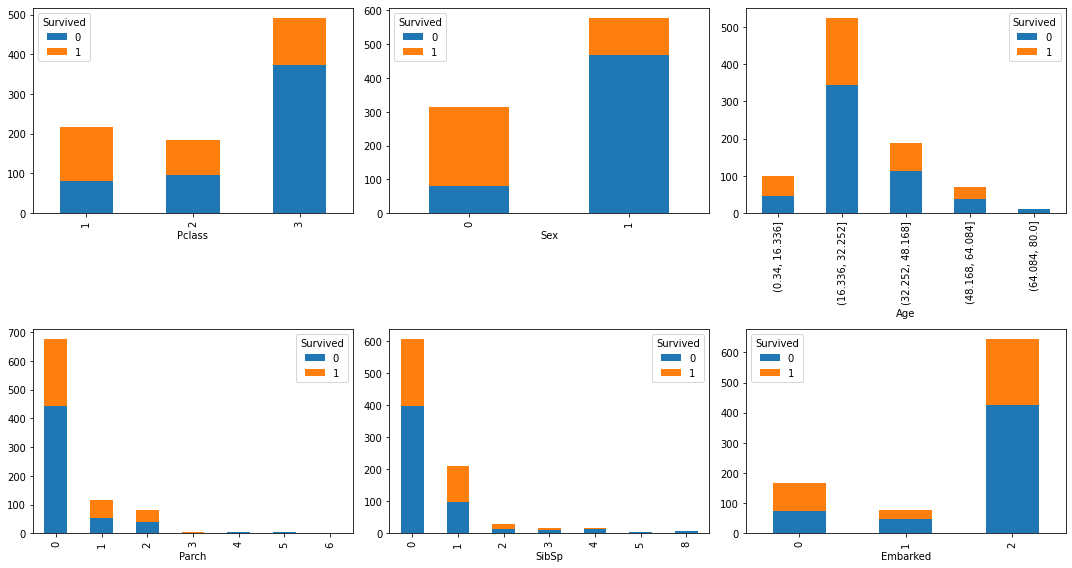

In [60]:
columns = ["Pclass", "Sex", "Age", "Parch", "SibSp", "Embarked"]

# create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.flatten()

# Loop through each columns and plot it
for i, col in enumerate(columns):
    df.groupby([col, "Survived"]).size().unstack().plot(kind="bar", ax=ax[i], stacked=True)

fig.tight_layout()

In [61]:
df = wrangle(TRAIN_DIR)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# Label encoding for "Sex" and "Embarked"

## Split Data

In [62]:
# split the data into features and labels
target = "Survived"
X = df.drop(columns=target)
y = df[target]

# split the data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [38]:
# # sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [39]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
# Train the model
history = model.fit(X_train,y_train,
                   epochs=100,
                   validation_data=(X_val, y_val))

Epoch 1/100
23/23 [==============================] - 0s 13ms/step - loss: 1.0455 - accuracy: 0.5941 - val_loss: 0.5892 - val_accuracy: 0.6425
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9680 - accuracy: 0.6053 - val_loss: 0.6210 - val_accuracy: 0.6313
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6419 - val_loss: 0.6330 - val_accuracy: 0.6145
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8385 - accuracy: 0.6011 - val_loss: 0.6272 - val_accuracy: 0.6313
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.6489 - val_loss: 0.6274 - val_accuracy: 0.6257
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7266 - accuracy: 0.6517 - val_loss: 0.6331 - val_accuracy: 0.5978
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7332 - accuracy: 0.6587 - val_loss: 0.6445 - val_accuracy: 0.5978
Epoch 8/100


23/23 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.6896 - val_loss: 0.5690 - val_accuracy: 0.6927
Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6882 - val_loss: 0.5626 - val_accuracy: 0.6927
Epoch 60/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.6854 - val_loss: 0.5644 - val_accuracy: 0.6983
Epoch 61/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.6826 - val_loss: 0.5599 - val_accuracy: 0.6983
Epoch 62/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.6938 - val_loss: 0.5620 - val_accuracy: 0.6983
Epoch 63/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.6994 - val_loss: 0.5597 - val_accuracy: 0.7151
Epoch 64/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.6882 - val_loss: 0.5561 - val_accuracy: 0.7095
Epoch 65/100
23/23 

## Save Model

In [44]:
# Save the model
model.save('./tmp/model/my_model.h5')